#**Laboratorio 9: aplicaciones del descenso de gradiente y el método de Newton**

**Facultad de ingeniería**

Departamento de Ingeniería Biomédica

Universidad de los Andes

**IBIO-2440** Programación científica

**Nombres de los integrantes**


1.   Paola Andrea Campiño 202020785
2.   Isabella Contreras 202011871

**Número del grupo**

*5*


#**1. Introducción al problema**

El centro de atención médica los robles es un centro de salud con más de 50 años de trayectoria que está ubicado en el centro del municipio de Santa Clara y dispone de empleados tanto administrativos como personal médico que viven en zonas aledañas al pueblo. El gerente del centro de salud en vista del deterioro que ha tenido el edificio durante los 50 años de funcionamiento quiere trasladar el centro de salud a una zona en la que se minimize en lo posible la distancia que debe recorrer los empleados para llegar al centro de salud, pero que al mismo tiempo no quede demasiado lejos de la posición actual del centro de salud. Para esto, contrata a un equipo de ingenieros biomédicos de la Universidad de los Andes con el fin de identificar la mejor localización para el nuevo centro de salud.

Después de hacer un estudio, se dispone de un histórico de la localización en coordenadas de la vivienda de 20 empleados que han trabajado en los últimos años en el centro de salud. También, se dispone de las coordenadas del actual centro de salud. Esta información se recolectó y se guardó en el archivo *localizaciones.csv*. Las primeras 20 coordenadas del archivo corresponden a la localización de los empleados, y la última es la del actual centro de salud. Para solucionar el problema y hallar el punto óptimo para la localización del nuevo centro de salud, el gerente pide:
 *   minimizar en lo posible la distancia euclidiana elevada al cuadrado entre cada coordenada de los empleados y la localización del nuevo centro de salud, y al mismo tiempo,


*   minimizar la distancia euclidiana elevada al cuadrado entre la localización del nuevo centro de salud y la ubicación actual del centro de salud.

La prioridad que le da el gerente a la minimización de las distancias de los empleados al nuevo centro es de 10 con respecto a la minimización de la distancia entre el nuevo y antiguo centro de salud. No se dispone de restricción alguna en la ubicación del centro de salud. Para facilitar el análisis, sea $x^{(i)}=[x_1^{(i)},x_2^{(i)}]^T$ las coordenadas del $i$-ésimo empleado, sea $p=[p_1,p_2]^T$ las coordenadas del nuevo puesto de salud, y sea $q=[q_1,q_2]^T$ las coordenadas del viejo puesto de salud.

#**2. Ejercicios**

**2.1.** Plantee el problema de optimización asociado a los requerimientos de la gerencia del centro de salud.


### Objetivo:

- Minimizar la distancia entre los empleados y la ubicación del nuevo centro de salud.
- Minimizar la distancia entre el viejo centro de salud y el nuevo centro de salud.

### Función objetivo:

la multiplicación de 10 por $f_1$ que representa a las distancias de los empleados más la importancia de la clinica antigua por la distancia de esta $f_2$. $q_1$ y $q_2$ se refiere a la variable de desición de la ubicación del centro de salud nuevo y $x_i$ hace referencia a la coordenada en $x_1$ en el que vive el trabajador i, y $y_i$ hace referencia a la coordenada en $x_2$ en la que vive el trabajador $i$.

$F(q_1,q_2) =  10 f_1(q_1,q_2)+  f_2(q_1,q_2)$

- $f_1(q_1,q_2)= \min_{q_1, q_2} (∑_0^{19}(q_1-x_{i})^2+(q_2-y_{i})^2)$
- $f_2(q_1,q_2)=\min_{q_1, q_2} ((q_1-x_{20})^2+(q_2-y_{20})^2)=\min_{x} ((q_1-p_1)^2+(q_2-p_2)^2)$

### Función objetivo completa:

$F(q_1,q_2) = \min_{q_1,q_2} ( 10*(∑_{i =0}^{i=19}(q_1-x_{i})^2+(q_2-y_{i})^2)+ (q_1-x_{20})^2+(q_2-y_{20})^2) $

### Variables de decisión:

- $q_1, q_2$

### Gradiente de una sola para una expresión :

A continuación se puede ver como se vería la expresión desde un punto cualquiera a el hospital nuevo. Con una importancia igual a 1.

\begin{align*}
  \left [ 2(q_1-x),  2(q_2-y)   \right]
\end{align*}
### Gradiente expresado para todos los puntos:


\begin{align*}
  \left [\sum_{0}^{19} 20(q_1-x_i) + 2(q_1-x_{20}) ,\sum_{0}^{19}20(q_2-y_i)+ 2(q_2-y_{20}) \right]
\end{align*}



### Hessiana de un solo punto:
A continuación se puede ver la hessiana expresada para punto cualquiera con una importancia igual a 1:


\begin{align*}
  \frac {δ^2f(x)}{δx^2} = 2
  \end{align*}

  \begin{align*}
  \frac {δ^2f(x)}{δy^2} = 2
  \end{align*}

   \begin{align*}
  \frac {δ^2f(x)}{δxy} = 0
  \end{align*}


<br>

### Hessiana para todos los punto:
A continuación se puede ver la hessiana planteada para la ubicación de los empleados y el centro de salud antiguo:

  \begin{pmatrix}
2*10*20+2 & 0 \\
0 &  2*10*20+2
\end{pmatrix}


<br>
  \begin{pmatrix}
402 & 0 \\
0 &  402
\end{pmatrix}

In [9]:
import numpy as np
import pandas as pd

df = pd.read_csv("localizaciones.csv")
columnas_deseadas = ["", "x", "y"]
data_seleccionado = df
print(data_seleccionado.head())
print(len(df))

x = df['x1']
y = df['x2']

          x1         x2
0  12.887282   3.730396
1   6.613240   6.301530
2  24.359178  16.290466
3  22.404661  44.512822
4  41.394321  28.931843
21


**2.2.** Implemente el método de descenso de gradiente para hallar la ubicación del centro de salud que minimiza la distancia que debe recorrer cada empleado. Para ello, utilice al menos 3 valores de $\alpha$. Defina bajo su propio juicio la tolerancia del criterio de parada y el número máximo de pasos del algoritmo. Justifique su elección.

In [10]:
def grad_(X):
    gradiente_l =[0,0]
    for i in range(0,len(df)-1):
      gradiente_l[0]+=20*(X[0]-df.iloc[i, 0])
      gradiente_l[1]+=20*(X[1]-df.iloc[i, 1])
    gradiente_l[0]+=2*(X[0]-df.iloc[len(df)-1, 0])
    gradiente_l[1]+=2*(X[1]-df.iloc[len(df)-1, 1])


    return gradiente_l


def alg_des_grad_err(x0=[0,0], a=0.001, n=120, e=0.01):
    x_array =[]
    x_array.append(np.array(x0))
    error_ = []
    for i in range(0,n):
         x_k = x_array[i]
         grad = grad_(x_k)
         x_new = x_k - a * np.array(grad)
         x_array.append(x_new)
         error = np.array(x_array[i+1])-np.array(x_array[i])
         error_.append(np.linalg.norm(error))
         if ( np.linalg.norm(error)<e):
          return (x_array,error_,True)

    return (x_array,error_,False)


# alpha igual 0.001

print("Alpha igual a 0.001:")
resultados =alg_des_grad_err(a=0.001)

print("Encontrado?: " +str(resultados[2]))
punto_fin= len(resultados[0])-1
print(resultados[0][punto_fin])


# alpha igual 0.0001

print("\n Alpha igual a 0.0001:")
resultados_1 = alg_des_grad_err(a=0.0001)

print("Encontrado?: " +str(resultados_1[2]))
punto_fin= len(resultados_1[0])-1
print(resultados_1[0][punto_fin])


# alpha igual 0.1

print("\n Alpha igual a 0.1:")
resultados_2 = alg_des_grad_err(a=0.1)

print("Encontrado?: " +str(resultados_2[2]))
punto_fin= len(resultados_2[0])-1
print(resultados_2[0][punto_fin])

Alpha igual a 0.001:
Encontrado?: True
[17.00928765 24.23255105]

 Alpha igual a 0.0001:
Encontrado?: True
[16.88255695 24.05200215]

 Alpha igual a 0.1:
Encontrado?: False
[-2.66200235e+192 -3.79246382e+192]


Para seleccionar los $α$ se ha optado por tomar tres posibles valores 0.001, 0.0001 y 0.1 cada uno se uso para un error maximo de 0.01, número que es bastante bajo y nos garantiza un error muy mínimo.
<br>


Al hacer las pruebas se llegó a notar que con un alpha muy alto de 0.1 núnca se llegó a converger. Contrario a lo que pasó con n=100 y un alpha igual a 0.001, que llegaba a un punto un con un error máximo de 0.01, en el tercer caso con alpha igual a 0.0001 no llegó a converger ya que no llegaba al umbral del error.

<br>

Para comprobar si hay un punto más exacto se realizo las pruebas con n = 120, en el que $α$ 0.0001 y 0.001 si llegaron a converger y los puntos a los que llegaban eran muy cercanos. En el caso de $α$ = 0.1 siempre llegó a infinito y por lo tanto no llegó a converger.

<br>

En base a lo anterior se optó por usar $α$ igual a 0.0001, n = 120 y e = 0.01, para analizar. ya que al tener un alpha más pequeño se piensa que se pudo haber llegado a un punto más exacto.



**2.3.** Grafique la trayectoria de la solución  seguida por el algoritmo según los parámetros dados (es decir, cómo cambia la ubicación del puesto de salud en cada paso del algoritmo). En la misma gráfica, pinte los puntos de las 20 coordenadas y la posición del puesto de salud actual.

Text(0, 0.5, 'x2')

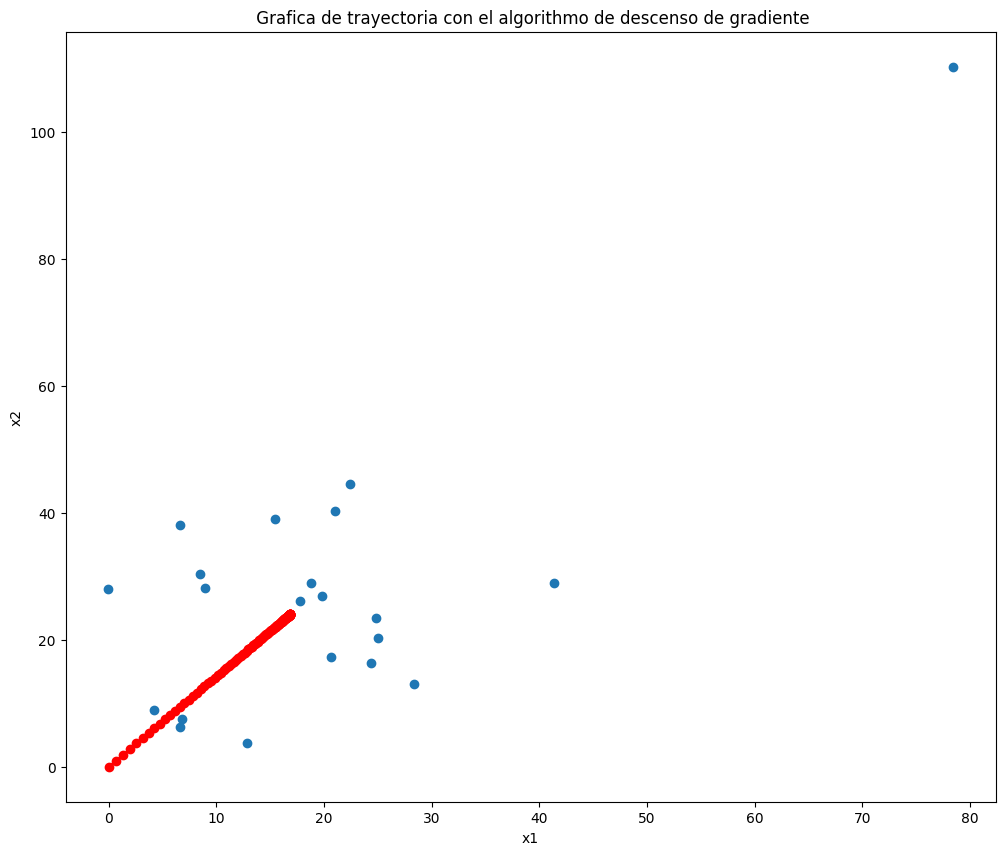

In [11]:
import matplotlib.pyplot as plt

figure_1 = plt.figure(figsize=(12, 10))
x_graf1=[]
y_graf1=[]

x_1 = np.linspace(-20,120,300)
x_2 = np.linspace(-20,120,300)
ax_1 = figure_1.add_subplot(1, 1, 1)
for i in resultados_1[0]:
    x_graf1.append(i[0])
    y_graf1.append(i[1])
ax_1.plot(x_graf1,y_graf1,marker='o', color="r")
ax_1.scatter(x, y)
ax_1.set_title(" Grafica de trayectoria con el algorithmo de descenso de gradiente")

ax_1.set_xlabel('x1')
ax_1.set_ylabel('x2')



**2.4.** Implemente el método de Newton para hallar la ubicación del centro de salud que minimiza la distancia que debe recorrer cada empleado. Defina bajo su propio juicio la tolerancia del criterio de parada y el número máximo de pasos del algoritmo.

In [12]:
def hesiana():
  hesiana_ls =[[0,0],[0,0]]
  for i in range(0,  (len(df)-1)):

      hesiana_ls[0][0]+=20
      hesiana_ls[1][1]+=20
  hesiana_ls[0][0]+=2
  hesiana_ls[1][1]+=2
  return np.array(hesiana_ls)

def inversa_hessiana():
  return np.linalg.inv(hesiana())

In [13]:
def newton_method(e=0.01, x_0=[0,0]):
  x_array =[]
  error_ray =[]
  x_array.append(np.array(x_0))
  for i in range(0,9999):
    x_k = x_array[i]
    grad = np.array(grad_(x_k))
    inv = inversa_hessiana()
    x_new = np.subtract(x_k, np.dot(grad, inv))
    x_array.append(x_new)
    error = np.array(x_array[i+1])-np.array(x_array[i])
    error_ray.append(np.linalg.norm(error))
    if ( np.linalg.norm(error)<e):
          return (x_array,error_ray,True)
  return (x_array,error_ray,False)
resultadoN = newton_method()

print("Encontrado?: " +str(resultadoN[2]))
punto_fin= len(resultadoN[0])-1
print(resultadoN[0][punto_fin])

Encontrado?: True
[17.01689788 24.24339309]


**2.5.** Grafique la trayectoria del algoritmo según los parámetros dados.  En la misma gráfica, pinte los puntos de las 20 coordenadas y la posición del puesto de salud actual. Justifique su elección.




Text(0, 0.5, 'x2')

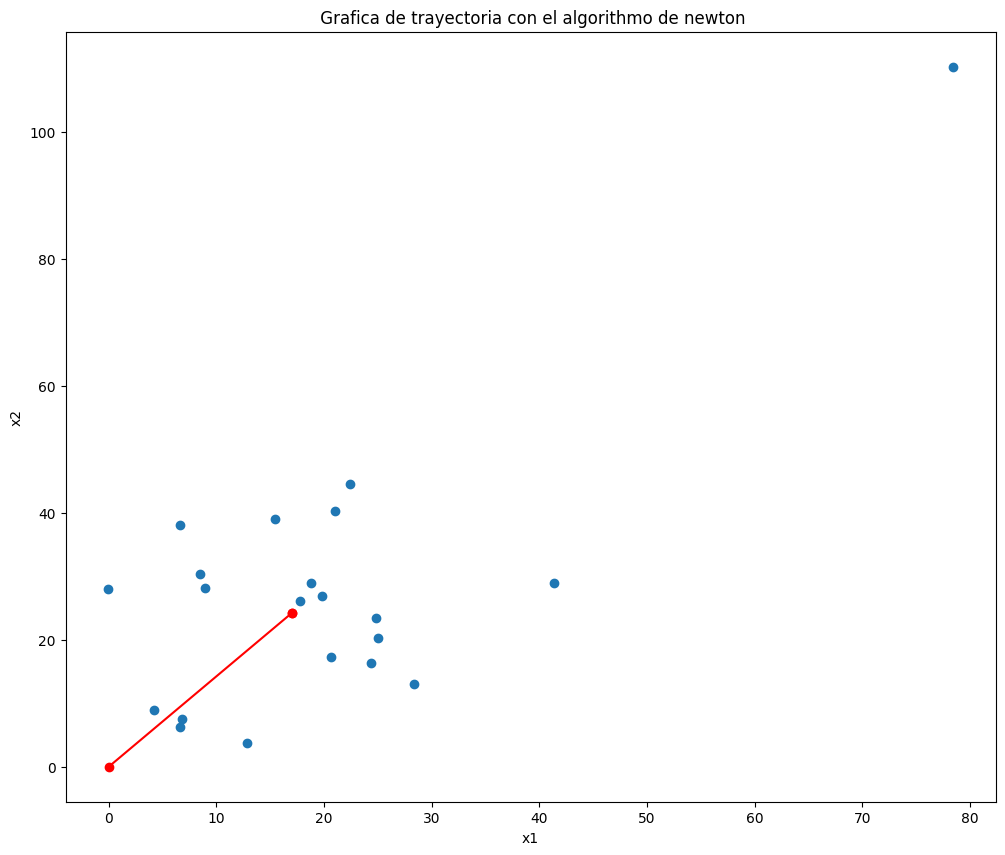

In [14]:
figure_2 = plt.figure(figsize=(12, 10))
x_graf1=[]
y_graf1=[]

x_1 = np.linspace(-20,120,300)
x_2 = np.linspace(-20,120,300)
ax_1 = figure_2.add_subplot(1, 1, 1)
for i in resultadoN[0]:
    x_graf1.append(i[0])
    y_graf1.append(i[1])
ax_1.plot(x_graf1,y_graf1,marker='o', color="r")
ax_1.scatter(x, y)
ax_1.set_title(" Grafica de trayectoria con el algorithmo de newton")

ax_1.set_xlabel('x1')
ax_1.set_ylabel('x2')

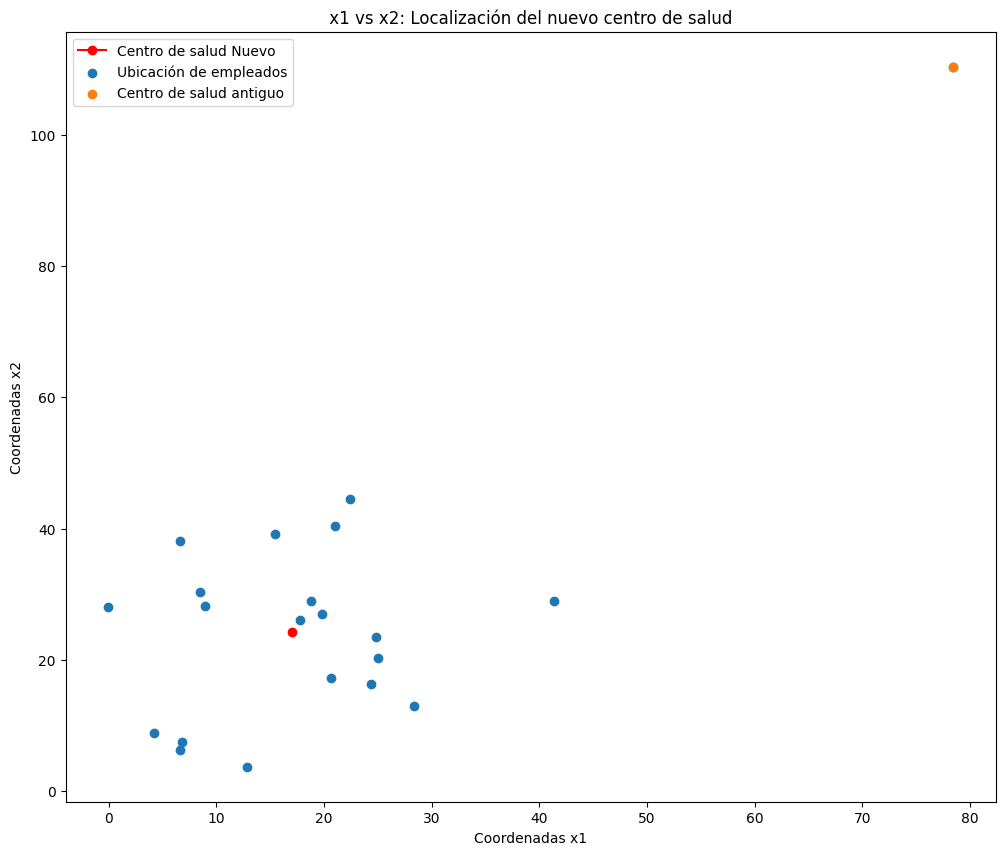

In [15]:
figure_3 = plt.figure(figsize=(12, 10))
x_graf1=[]
y_graf1=[]
x_cma = x[len(x)-1]
y_cma = y[len(y)-1]
x_1 = np.linspace(-20,120,300)
x_2 = np.linspace(-20,120,300)
ax_1 = figure_3.add_subplot(1, 1, 1)


x_graf1.append(resultadoN[0][len(resultadoN[0])-1][0])
y_graf1.append(resultadoN[0][len(resultadoN[0])-1][1])
ax_1.plot(x_graf1,y_graf1,marker='o', color="r", label='Centro de salud Nuevo')

ax_1.scatter(x, y, label='Ubicación de empleados')
ax_1.set_title(" x1 vs x2: Localización del nuevo centro de salud ")
ax_1.scatter(x_cma, y_cma, label='Centro de salud antiguo')

ax_1.set_xlabel('Coordenadas x1')
ax_1.set_ylabel('Coordenadas x2')

ax_1.legend(loc = 'upper left')


**2.6.** Analice los resultados obtenidos con cada algoritmo.

En base a lo anterior se pudo notar que con ambos algorithmos se llego a puntos muy cercanos de [ ≈ 17.00, ≈ 24.24], se puede notar que con el algorithmo de decenso de gradiente se requiere mucho más maquina/procesamiento y un proceso más largo de casi 120 calculos para determinar el punto más optimo. Contrario a lo que pasa con el algorithmo de newton en donde en solo **un paso** se llegó a el punto de convergencia debido a que la función definida es de grado 2.


Fue mucho mejor el proceso de sacar el punto de interes usando el **algorithmo de newton**, ya que la hessiana era constante, y por esta razón solo se llegó en un solo paso.

**2.7.** Presente los resultados a las directivas del centro de salud junto con la conclusión de su estudio. Genere gráficas lo suficientemente claras y bien presentadas, con una selección de colores y notación que facilite el entendimiento de las directivas del centro de salud.


Se realizó un estudio para encontrar la mejor ubicación para el nuevo centro de salud. Nuestro objetivo es minimizar la distancia que deben recorrer los empleados para llegar al centro. También queremos asegurarnos de que no esté demasiado lejos del centro actual.
Para esto se tuvo en cuenta un documento donde se encuentran las ubicaciones de algunos de los empleados.
Para lograr este objetivo se utilizaron dos algoritmos para determinar el lugar más optimo  lo cual nos llevó a las siguientes graficas, en donde el punto rojo es la ubicación del nuevo centro de salud, el punto naranja es la ubicación del antiguo y los puntos azules son la ubicación de los empleados.

Es importante tener en cuenta que estos resultados se basan en la información que tenemos actualmente y pueden ser aún más precisos si se obtienen datos más recientes sobre la ubicación de los empleados de todos los empleados.

Como resultado se obtuvo que que la ubicación del centro de salud nuevo más optimo está dado por las coordenadas de $[x_1,x_2]=$ **[17.016, 24.243]**. A continuación se puede ver una gráfica visual de la ubicación del nuevo centro de salud, así como la ubicación actual de los empleados y la ubicación del centro de salud antiguo:




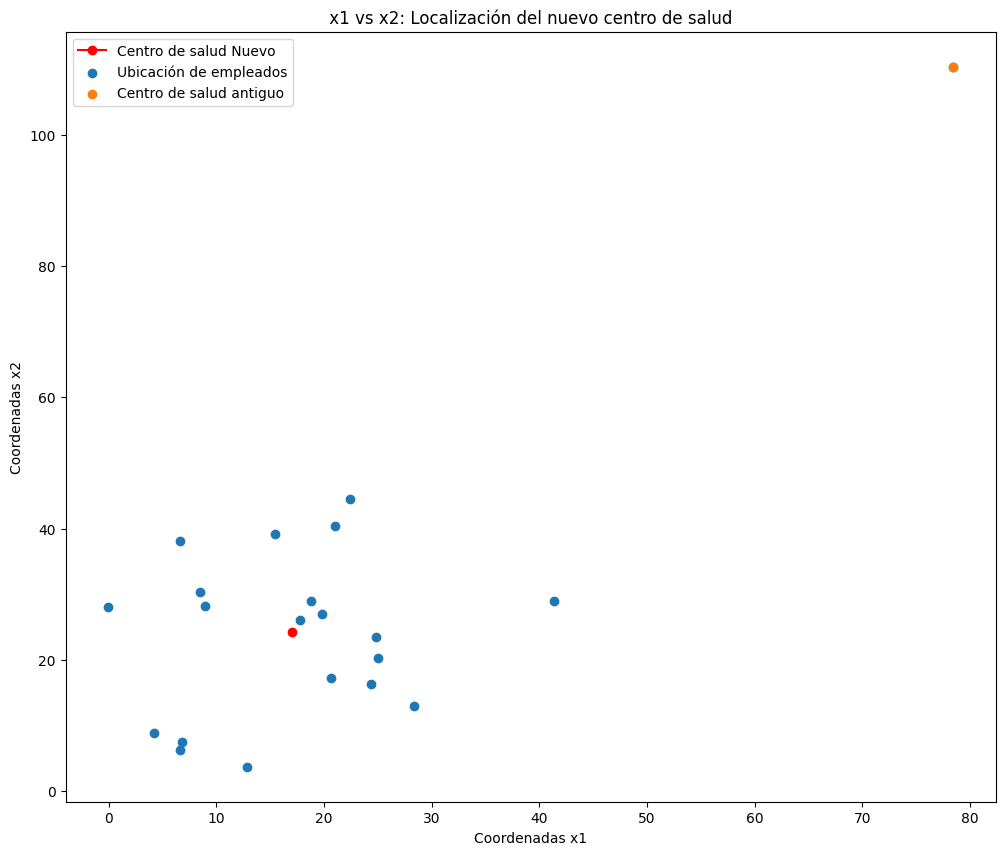